In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [3]:
df_events.columns

Index([u'timestamp', u'event', u'person', u'url', u'sku', u'model',
       u'condition', u'storage', u'color', u'skus', u'search_term',
       u'staticpage', u'campaign_source', u'search_engine', u'channel',
       u'new_vs_returning', u'city', u'region', u'country', u'device_type',
       u'screen_resolution', u'operating_system_version', u'browser_version'],
      dtype='object')

In [4]:
df_events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#models = df_events[["model","storage","event"]]
#models = models.loc(models["storage"].isnull()== False)
#models.head()

models = df_events.loc[df_events["storage"].isnull() == False,:]
#models = models.loc[df_events["event"] == "checkuot",:]
models = models[["model","storage","event"]]
models = models.loc[models["event"] == "checkout" ,:]
models.head()

,model,storage,event
3,iPhone 5s,32GB,checkout
7,Samsung Galaxy S8,64GB,checkout
44,Motorola Moto Z Play,32GB,checkout
85,Samsung Galaxy J5,16GB,checkout
86,Samsung Galaxy J5,16GB,checkout


In [6]:
models.count()

model      33733
storage    33733
event      33733
dtype: int64

In [14]:
storage = models["storage"].value_counts()
storage.index = [16,32,64,8,128,4,256,0.512]
#storage["capacidad en string"] = ["256GB","128GB","64GB","32GB","16GB","8GB","4GB","512MB"]
storage = storage.sort_index()
#storage.index = ["256GB","128GB","64GB","32GB","16GB","8GB","4GB","512MB"]
storage

0.512         63
4.000        295
8.000       3638
16.000     12462
32.000      9729
64.000      5436
128.000     1840
256.000      270
Name: storage, dtype: int64

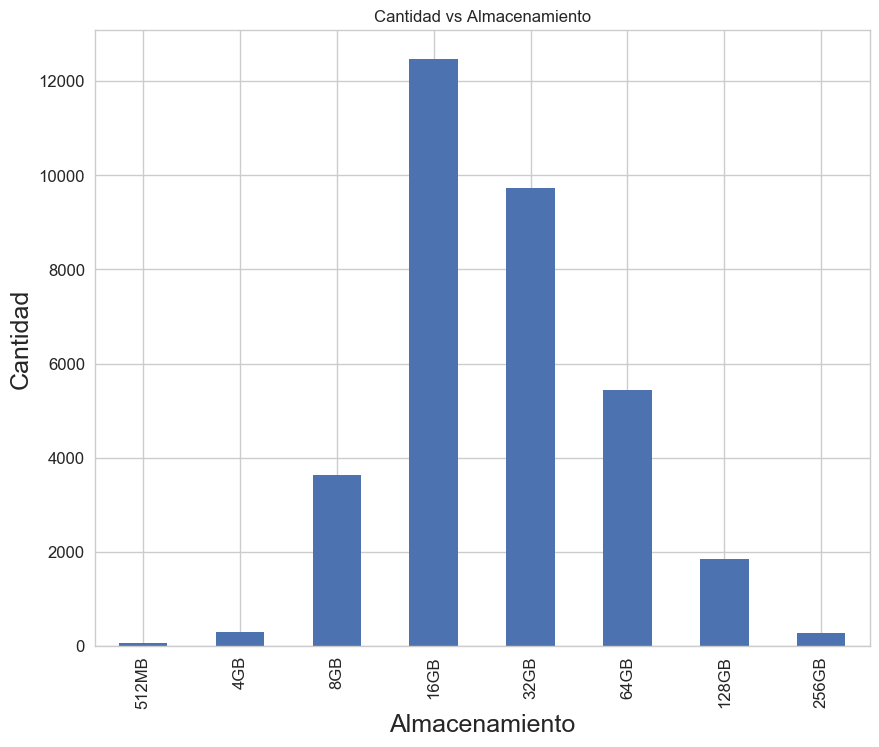

In [16]:
ax = storage.plot(kind = 'bar', title = "Cantidad vs Almacenamiento",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Almacenamiento", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
ax.set_xticklabels(["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"])
plt.show()

# Diferentes colores en las compras

In [9]:
models = df_events.loc[df_events["storage"].isnull() == False,:]
#models = models.loc[df_events["event"] == "checkuot",:]
models = models[["model","storage","event","color"]]
models = models.loc[models["event"] == "checkout" ,:]

In [10]:
model = models["model"].value_counts()
model = model.head(20)
model.head(20)

iPhone 6                    3295
iPhone 5s                   2744
iPhone 6S                   2308
Samsung Galaxy J5           1918
Samsung Galaxy S7           1234
iPhone 7                    1205
Samsung Galaxy S8           1074
iPhone 7 Plus                924
Samsung Galaxy J7 Prime      866
Samsung Galaxy S6 Flat       844
Samsung Galaxy S7 Edge       843
Samsung Galaxy J7            789
iPhone SE                    635
iPhone 6 Plus                625
iPhone 5c                    603
Samsung Galaxy S6 Edge       576
iPhone 6S Plus               560
Motorola Moto G4 Plus        508
Samsung Galaxy S8 Plus       487
Motorola Moto G2 3G Dual     486
Name: model, dtype: int64

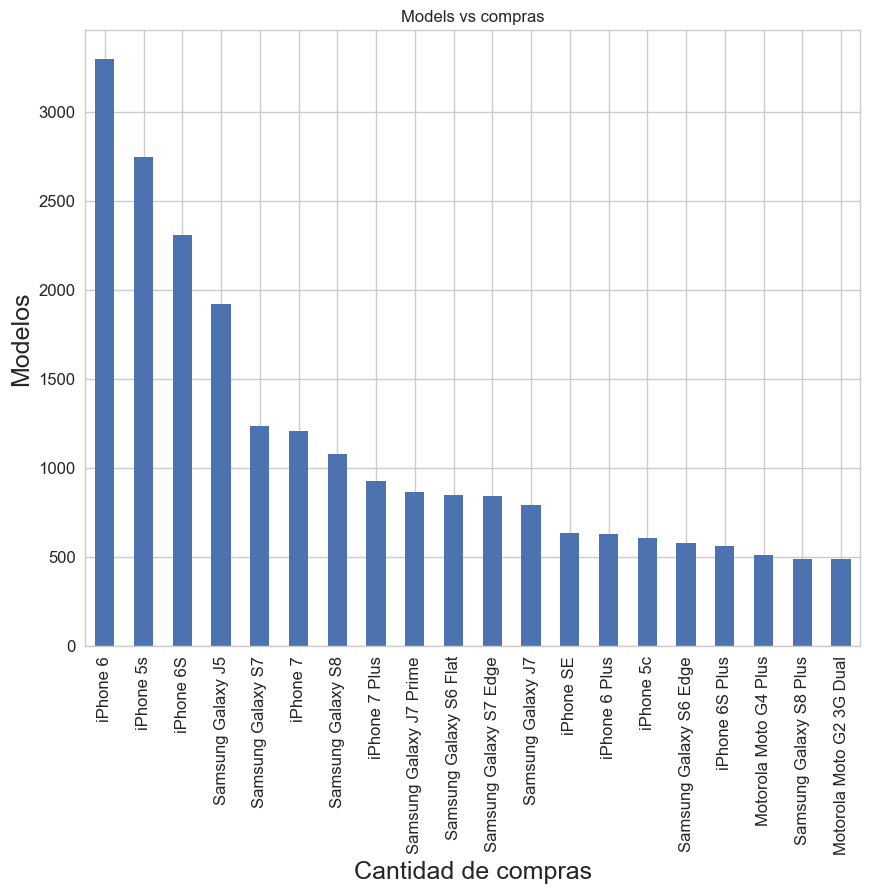

In [13]:
ax = model.plot(kind = 'bar', title = "Models vs compras",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Cantidad de compras",fontsize = 18)
ax.set_ylabel("Modelos",fontsize = 18)
plt.show()

In [83]:
models = df_events.loc[df_events["storage"].isnull() == False,:]

models = models[["model","storage","event","color"]]
models = models.loc[models["event"] == "checkout" ,:]
models

,model,storage,event,color
3,iPhone 5s,32GB,checkout,Cinza espacial
7,Samsung Galaxy S8,64GB,checkout,Dourado
44,Motorola Moto Z Play,32GB,checkout,Preto
85,Samsung Galaxy J5,16GB,checkout,Preto
86,Samsung Galaxy J5,16GB,checkout,Preto
94,iPhone 5c,16GB,checkout,Branco
95,iPhone 5c,8GB,checkout,Branco
103,Samsung Galaxy J5,16GB,checkout,Preto
110,iPhone 6,128GB,checkout,Cinza espacial
114,Samsung Galaxy S6 Flat,32GB,checkout,Preto


In [94]:
#color = models["color"].value_counts()
#color = color.head(20)
#color

Preto              8572
Dourado            8091
Cinza espacial     3514
Branco             3453
Prateado           2610
Ouro Rosa          1905
Prata               884
Rosa                759
Preto Matte         741
Platinum            492
Cinza               390
Azul                384
Ametista            376
Ouro                281
Preto Brilhante     227
Vermelho            107
Bambu               107
Preto Vermelho       99
Titânio              93
Verde                89
Name: color, dtype: int64

In [106]:
#colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Cinza espacial" : "Negro", "Branco": "Blanco", "Prateado" : "Plata", "Ouro Rosa" : "Rosa", "Prata" : "Plata", "Rosa" : "Rosa",
          "Preto Matte": "Negro", "Platinum" :"Plata", "Cinza" : "Plata", "Azul": "Azul", "Ametista": "Otros", "Ouro": "Dorado", "Preto Brilhante" : "Negro", "Vermelho": "Otros",
          "Bambu":"Otros","Preto Vermelho": "Otros","Titânio": "Otros", "Verde": "Otros" }
#models2["pepe"] = models['color'].isin(color.index)
3models2 = models2.loc[models2["pepe"] == True,:]
#models2["pepe"].value_counts()
#models2["color"].value_counts()
#models = models2[color] 
#models2 = models2.loc[models2["color"].isin(color.index),:]
#models2["color"].value_counts()
#models2["Colores generalizados"] = models2["color"].map(lambda value: colores[value])

Preto               8572
Dourado             8091
Cinza espacial      3514
Branco              3453
Prateado            2610
Ouro Rosa           1905
Prata                884
Rosa                 759
Preto Matte          741
Platinum             492
Cinza                390
Azul                 384
Ametista             376
Ouro                 281
Preto Brilhante      227
Bambu                107
Vermelho             107
Preto Vermelho        99
Titânio               93
Verde                 89
Branco Vermelho        0
Cabernet               0
Cobre                  0
Ônix                   0
Branco Cabernet        0
Branco Verde           0
Branco Pink            0
Branco Framboesa       0
Branco Dourado         0
Couro Marrom           0
                    ... 
Black Piano            0
Azul Topázio           0
Azul Safira            0
Azul Escuro            0
Coral                  0
Iuna                   0
Couro Navy             0
Couro Vinho            0
Verde Água             0


In [ ]:
ax = colores.plot(kind = 'bar', title = "Models vs compras",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Cantidad de compras",fontsize = 18)
ax.set_ylabel("Modelos",fontsize = 18)
plt.show()